# Descriptive Statistics with Pandas

In this Notebook, we use a real dataset on real estate prices in King Country, in the United States, to learn how to obtain descriptive statistics about the data.

The dataset is taken from [Kaggle] (https://www.kaggle.com/harlfoxem/housesalesprediction).

## Purpose

In the following exercises, we use Pandas to obtain simple statistics.

## Information about the data

The dataset contains the sale price of homes sold between May 2014 and May 2015 in King County, which includes Seattle, Washington.

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

We start by reading (`pd.read_csv`) and doing a little validation (`.head ()`) of the data.

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**We list all columns and their types.**

In [3]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

----

1. What is the most expensive sale price? What's it's `id`?
2. What is the cheapest sale price? What's it's `id`?

In [4]:
### BEGIN SOLUTION
price_most_expensive = data['price'].max()
id_most_expensive = data['id'][data['price'].idxmax()]
price_cheapest = data['price'].min()
id_cheapest = data['id'][data['price'].idxmin()]
### END SOLUTION 

##### Testes

In [5]:
assert price_most_expensive == 7700000.0
assert id_most_expensive == 6762700020
assert price_cheapest == 75000.0
assert id_cheapest == 3421079032

---

**Let's look at the number of rooms (column `bedrooms`).**
- What is the maximum and minimum number of rooms in the data?
- What is the most common number of rooms (i.e., typology)?
- What is the average number of rooms?
- What is the median of rooms?
- What is the standard deviation?

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
### BEGIN SOLUTION
max_bedrooms = data['bedrooms'].max()
min_bedrooms = data['bedrooms'].min()
most_common_bedrooms = data['bedrooms'].mode()[0]
bedrooms_mean = round(data['bedrooms'].mean(), 2)
bedrooms_median = int(data['bedrooms'].median())
bedrooms_std = round(data['bedrooms'].std(), 2)
### END SOLUTION

##### Testes 

In [7]:
assert max_bedrooms == 33
assert min_bedrooms == 0
assert most_common_bedrooms == 3
assert math.isclose(bedrooms_mean, 3.37, abs_tol = 0.01)
assert bedrooms_median == 3
assert math.isclose(bedrooms_std, 0.93, abs_tol = 0.01)

----

Previously, we calculated basic statistics on the number of rooms in the houses observed.

Now, **let's look closely at the numbers obtained**:

- Are the minimum and maximum close to the mean and median?
- Is the median higher or lower than the average? Is it an expected result?
- Considering the answer to the questions above, do we expect the distribution of the number of rooms to be skewed?
- If the answer is yes, do we expect a positive or negative bias?

Finally, **calculates the skew and flatten of the distribution to confirm the answer to the questions above**.

<AxesSubplot:ylabel='Frequency'>

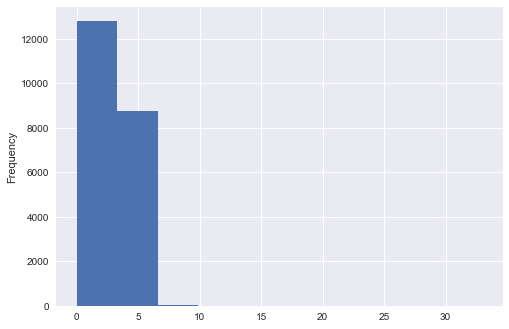

In [8]:
### BEGIN SOLUTION
bedrooms_skew = round(data['bedrooms'].skew(),3)
bedrooms_flatness = round(data['bedrooms'].kurt(),3)

#data['bedrooms'].plot(kind = 'box', vert= False)
data['bedrooms'].plot(kind = 'hist')

### END SOLUTION

##### Testes 

In [9]:
assert math.isclose(bedrooms_skew, 1.974, abs_tol=0.001)
assert math.isclose(bedrooms_flatness, 49.063, abs_tol=0.001)

---

**Let's find the quartiles of the house area (column `sqft_living`).**

In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
### BEGIN SOLUTION
quartiles = [0, .25, .5, .75, 1]
quartiles_house = data['sqft_living'].quantile(q=quartiles)
### END SOLUTION

pd.DataFrame({'Quartiles': quartiles_house})

,Quartiles
0.00,290.0
0.25,1427.0
0.50,1910.0
0.75,2550.0
1.00,13540.0


##### Testes 

In [12]:
assert quartiles_house.sum() == 19717

**The house size distribution (column `sqft_living`) is positively biased, with *outliers*. Let's see.**

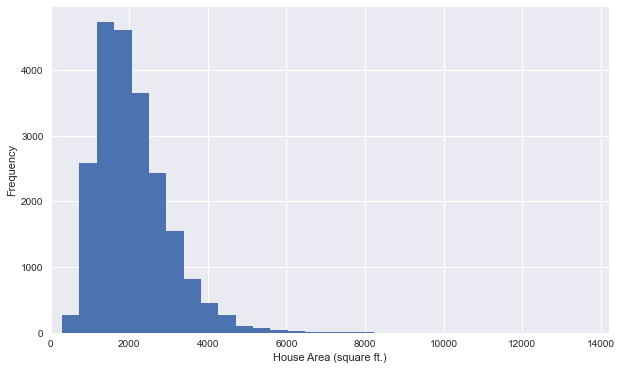

In [14]:
data['sqft_living'].plot.hist(bins=30, figsize=(10,6));
plt.xlim(0);
plt.xlabel('House Area (square ft.)');

**In this case, we will assume that the values are real and that the variability is natural: we are in the presence of a "long tail".**

**This is because, although most houses are of comparable size, there is a minority of much larger houses.**

**Thus, we will apply a logarithmic transformation to minimize this variability.**

**Let's:**
* Obtain the mean and median of the areas (column `sqft_living`). Which of the central tendency measures is highest? Is this result expected?
* Create a new column (called, without creativity, `log_sqft_living`) with the logarithm of the areas.
* Obtain the mean and median of the new variable. Are they still very different from each other?
* Obtain the bias for the size of the houses before (`sqft_living`) and after (` log_sqft_living`) of the transformation.
* View histograms.

In [15]:
### BEGIN SOLUTION
area_mean = round(data['sqft_living'].mean(), 1)
area_median = round(data['sqft_living'].median(), 1)

data['log_sqft_living'] = np.log(data['sqft_living'])

log_area_mean = round(data['log_sqft_living'].mean(),2)
log_area_median = round(data['log_sqft_living'].median(),2)

area_skew = data['sqft_living'].skew()
log_area_skew = data['log_sqft_living'].skew()
### END SOLUTION

**We can observe the new distribution (after the logarithmic transformation) through a histogram.**

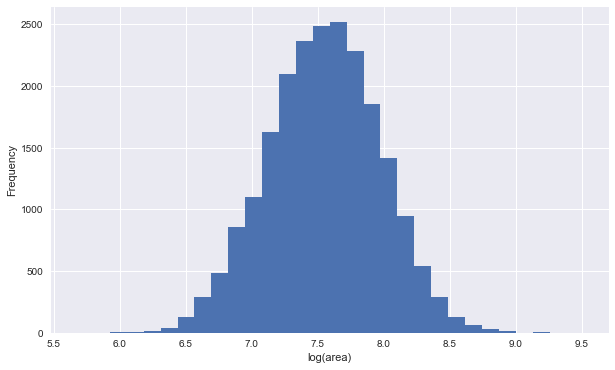

In [16]:
data['log_sqft_living'].plot.hist(bins=30, figsize=(10,6));
plt.xlabel('log(area)');

##### Testes 

In [17]:
assert math.isclose(area_mean, 2079.9, abs_tol=0.1)
assert math.isclose(area_median, 1910.0, abs_tol=0.1)
assert math.isclose(log_area_mean, 7.55, abs_tol=0.01)
assert math.isclose(log_area_median, 7.55, abs_tol=0.01)
assert math.isclose(area_skew, 1.471, abs_tol=0.001)
assert math.isclose(log_area_skew, -0.035, abs_tol=0.001)
assert math.isclose(data['log_sqft_living'].sum(), 163185.38, abs_tol=0.1)

----